In [1]:
from skimage import morphology
from scipy import ndimage
from os import listdir
import PIL
import skimage
import PIL.ImageOps

In [2]:
path = 'D:\project_tensorflow_class\Data (1)\original/err/'

In [3]:
matplotlib

Using matplotlib backend: Qt4Agg


In [4]:
##getting files
get_files = listdir(path)
get_files.sort()
get_files

['.picasa.ini',
 'E02 (1).jpg',
 'E02 (10).jpg',
 'E02 (15).jpg',
 'E02 (16).jpg',
 'E02 (17).jpg',
 'E02 (18).jpg',
 'E02 (2).jpg',
 'E02 (20).jpg',
 'E02 (21).jpg',
 'E02 (22).jpg',
 'E02 (23).jpg',
 'E02 (24).jpg',
 'E02 (25).jpg',
 'E02 (26).jpg',
 'E02 (27).jpg',
 'E02 (28).jpg',
 'E02 (29).jpg',
 'E02 (3).jpg',
 'E02 (30).jpg',
 'E02 (31).jpg',
 'E02 (32).jpg',
 'E02 (33).jpg',
 'E02 (34).jpg',
 'E02 (35).jpg',
 'E02 (36).jpg',
 'E02 (37).jpg',
 'E02 (38).jpg',
 'E02 (39).jpg',
 'E02 (4).jpg',
 'E02 (40).jpg',
 'E02 (41).jpg',
 'E02 (42).jpg',
 'E02 (5).jpg',
 'E02 (6).jpg',
 'E02 (7).jpg',
 'E02 (8).jpg',
 'E02 (9).jpg',
 'none.jpg',
 'test']

In [5]:
j = 0
for i,file in enumerate(get_files):
    if file.find('.jpg') == -1:
        print(i,get_files.pop(i-j))
#         j+=1
get_files

0 .picasa.ini
38 test


['E02 (1).jpg',
 'E02 (10).jpg',
 'E02 (15).jpg',
 'E02 (16).jpg',
 'E02 (17).jpg',
 'E02 (18).jpg',
 'E02 (2).jpg',
 'E02 (20).jpg',
 'E02 (21).jpg',
 'E02 (22).jpg',
 'E02 (23).jpg',
 'E02 (24).jpg',
 'E02 (25).jpg',
 'E02 (26).jpg',
 'E02 (27).jpg',
 'E02 (28).jpg',
 'E02 (29).jpg',
 'E02 (3).jpg',
 'E02 (30).jpg',
 'E02 (31).jpg',
 'E02 (32).jpg',
 'E02 (33).jpg',
 'E02 (34).jpg',
 'E02 (35).jpg',
 'E02 (36).jpg',
 'E02 (37).jpg',
 'E02 (38).jpg',
 'E02 (39).jpg',
 'E02 (4).jpg',
 'E02 (40).jpg',
 'E02 (41).jpg',
 'E02 (42).jpg',
 'E02 (5).jpg',
 'E02 (6).jpg',
 'E02 (7).jpg',
 'E02 (8).jpg',
 'E02 (9).jpg',
 'none.jpg']

In [6]:
## PILImage 개체를 바이너라이즈(이진화 시킴)
def make_bw (x):
    img_ret= x.point(lambda c : 255 if c >127 else 0)
    return img_ret

In [7]:
img = path + get_files[15]

In [8]:
Pa = PIL.Image.open(img)
a = np.array(Pa)

## Denoising

### Gamma control - grid search

In [9]:
fig,axes = plt.subplots(2,2)
((ax1, ax2), (ax3, ax4)) = axes

fig.add_subplot(221,label = 'a')
plt.imshow(a)
ax1.set_title('a')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(222,label = 'gamma = 3')
plt.imshow((a/255)**3)
ax2.set_title('gamma = 3')
plt.axis('off')
plt.axis('tight')


fig.add_subplot(223,label = 'gamma = 6')
plt.imshow((a/255)**6)
ax3.set_title( 'gamma = 6')
plt.axis('off')
plt.axis('tight')

fig.add_subplot(224,label ='gamma 13')
plt.imshow((a/255)**13)
ax4.set_title('gamma 13')
plt.axis('off')
plt.axis('tight')

fig.subplots_adjust(left=0.01,top=0.95,bottom = 0,right=1)

### gray scaled

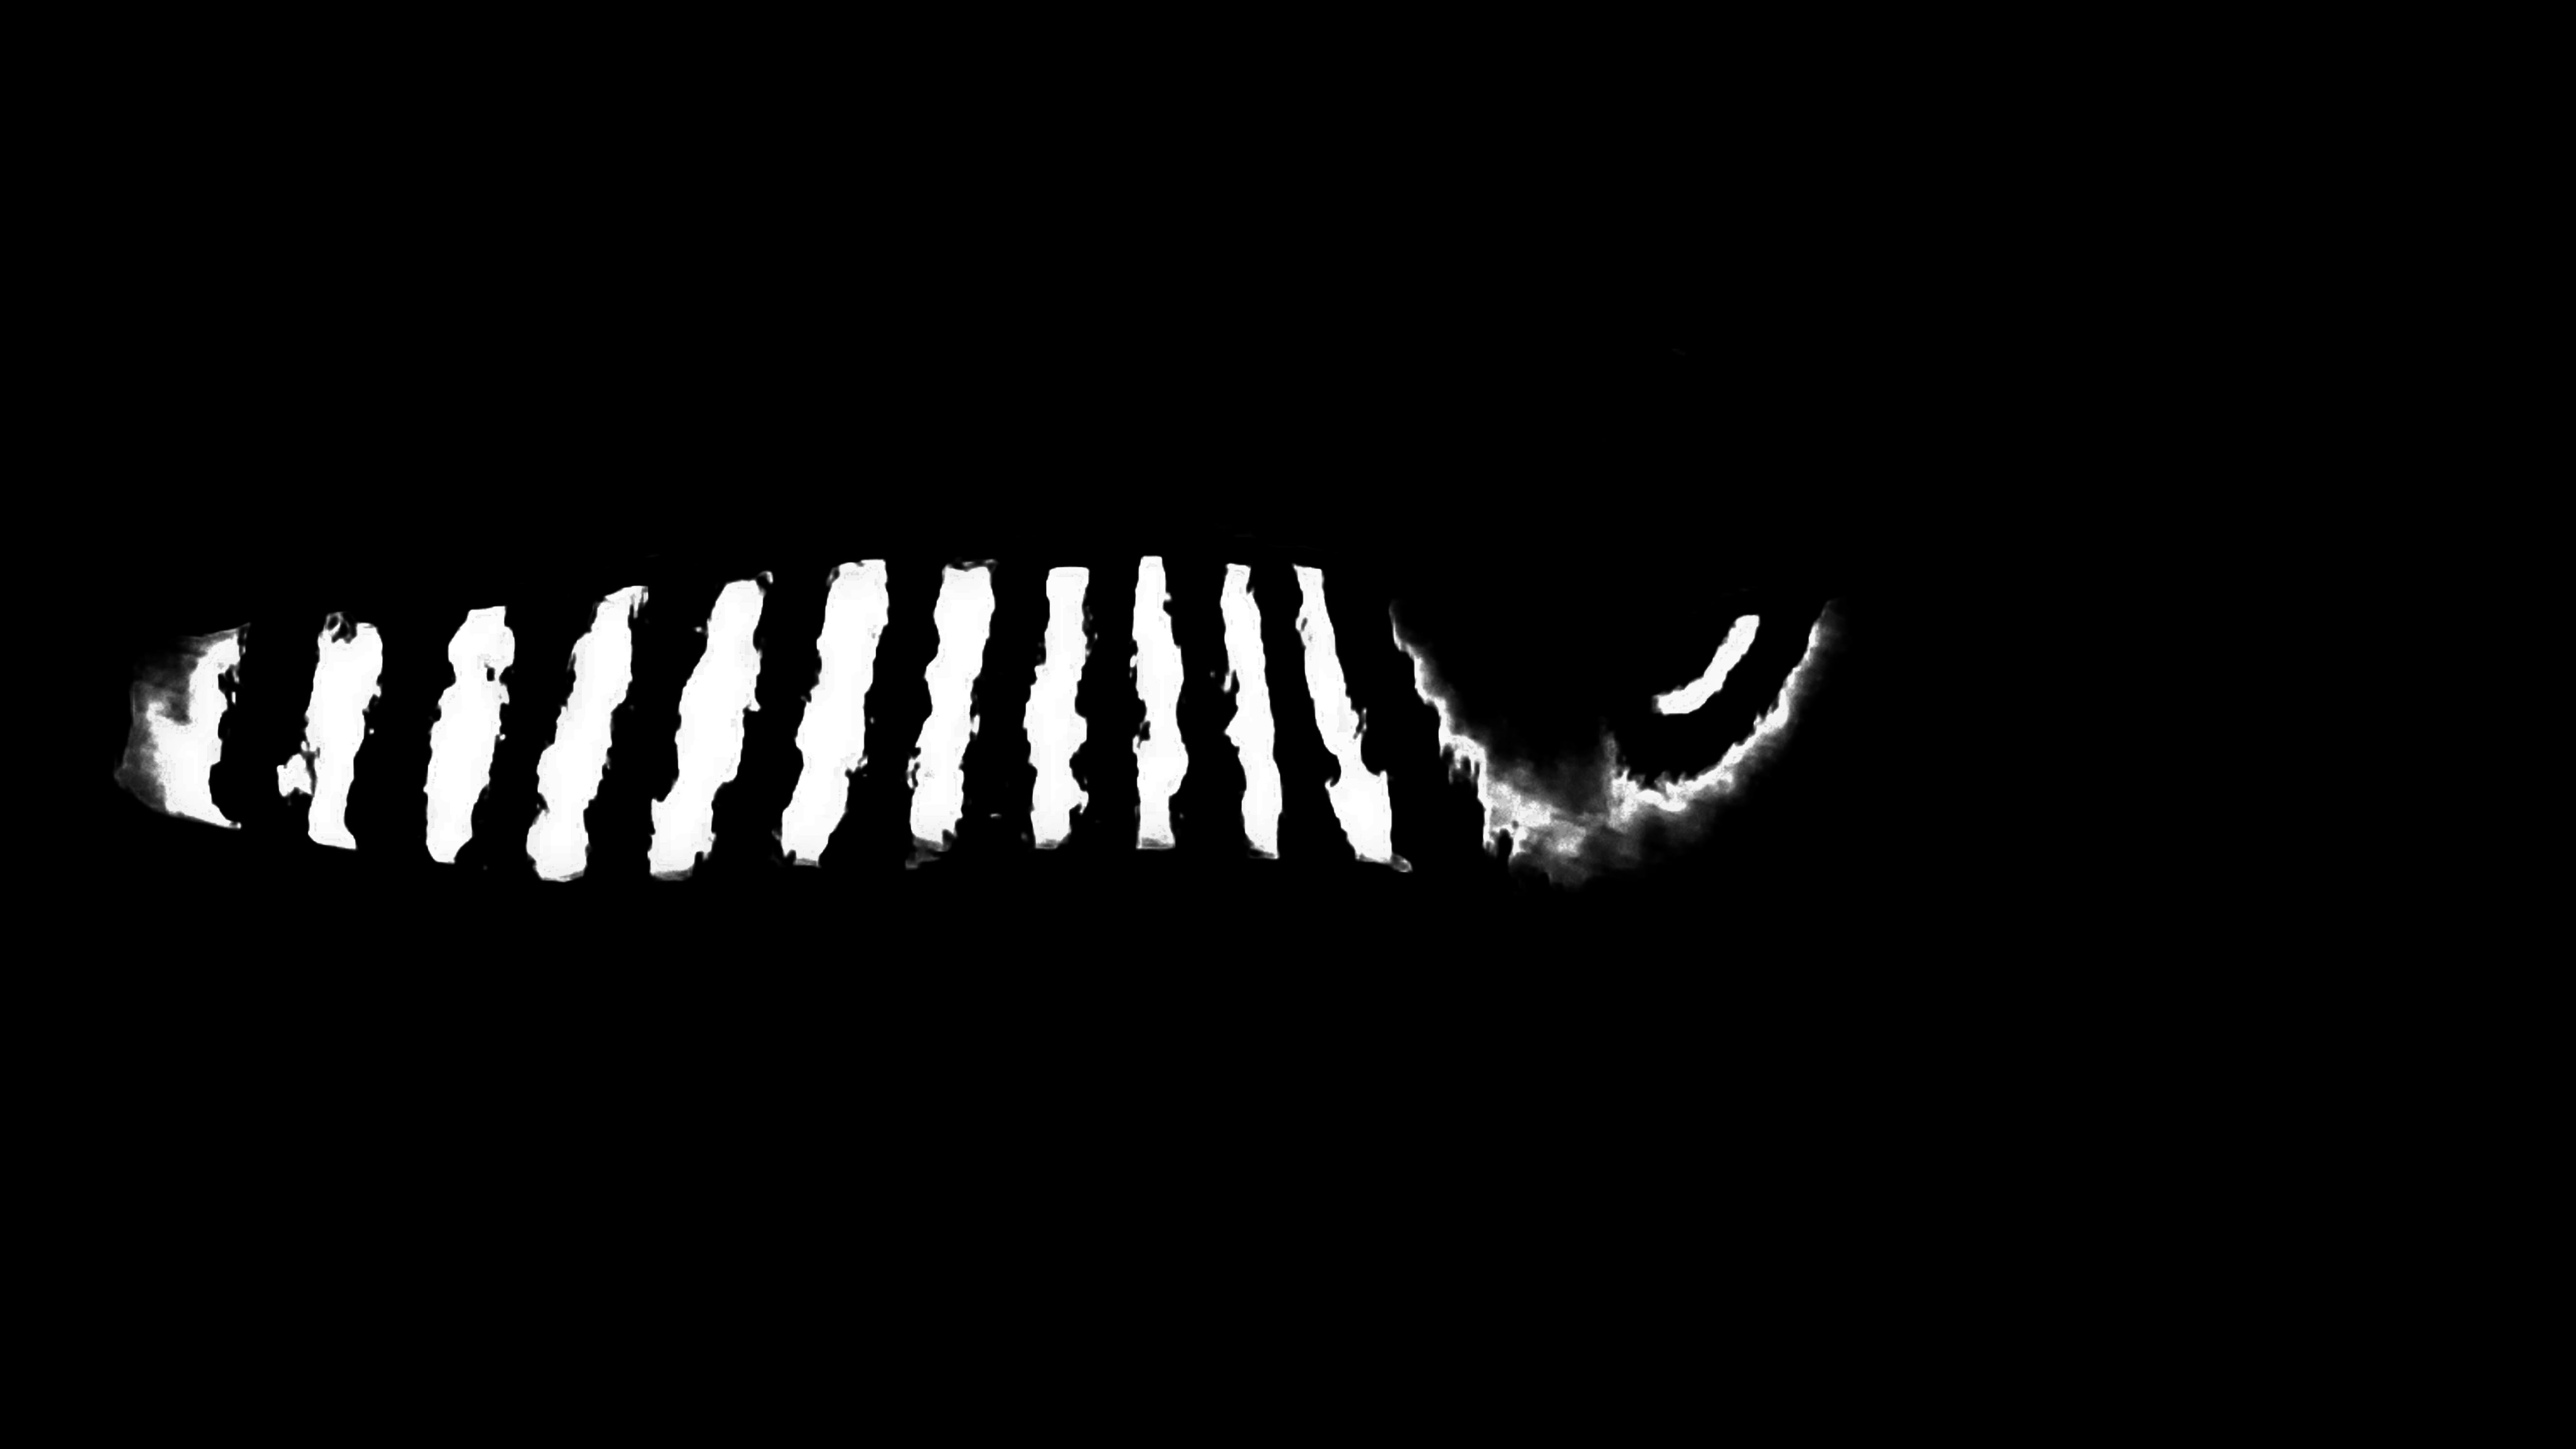

In [10]:
ps_new = Pa.copy()
Pa.point(lambda s :255*(s/255)**13).convert('L')

In [11]:
ps_new = ps_new.convert('L')

In [12]:
ps_new2 = ps_new.point(lambda s :255*(s/255)**13)

In [13]:
ps_new_inv = PIL.ImageOps.invert(ps_new2)

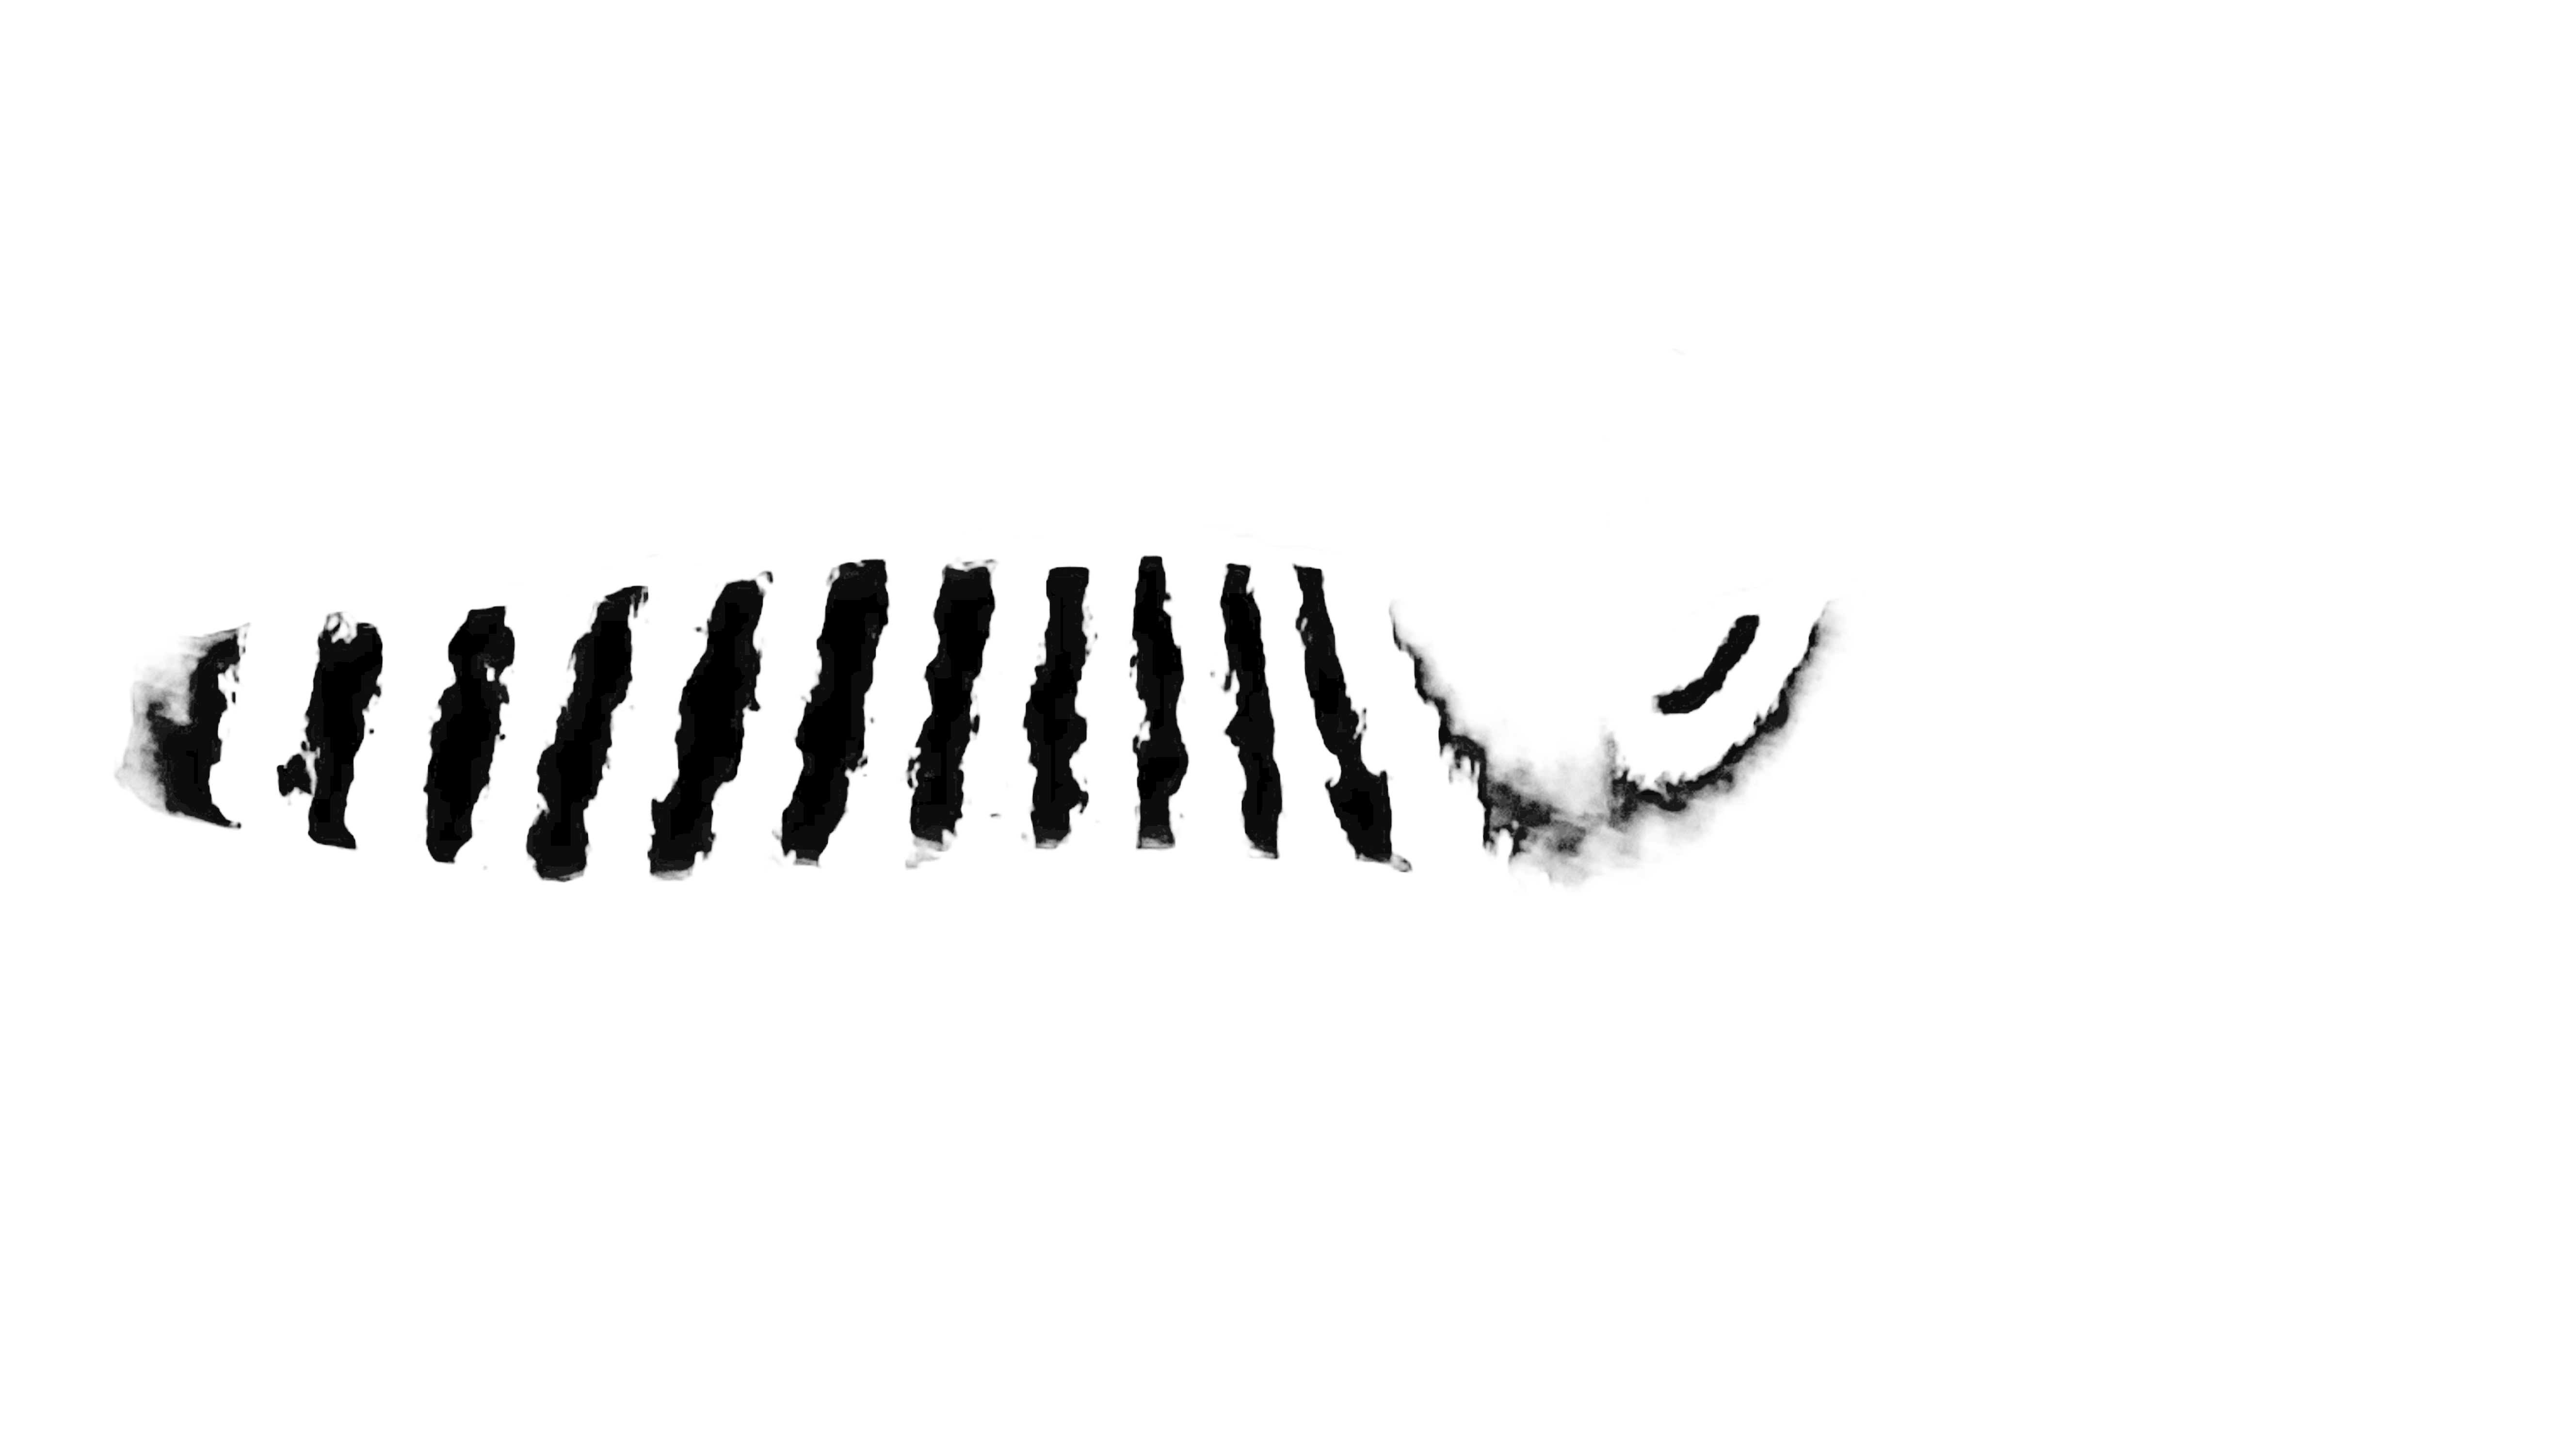

In [14]:
ps_new_inv

### Dilation and erosion -grid search / openning is need between them

In [15]:
# erosion and dilation
def grey_ero_dil (x,iterat = 3, n_ero = 30, n_dil=20):
    for i in range(iterat):
        
        e = ndimage.grey_erosion(x, n_ero)
        #,structure=[[0,1,2],[0,2,0],[1,2,0]]

        r= ndimage.grey_dilation(e, n_dil)

    return r

In [16]:
gogo = grey_ero_dil(ps_new2,iterat=5,n_ero=13, n_dil=60)

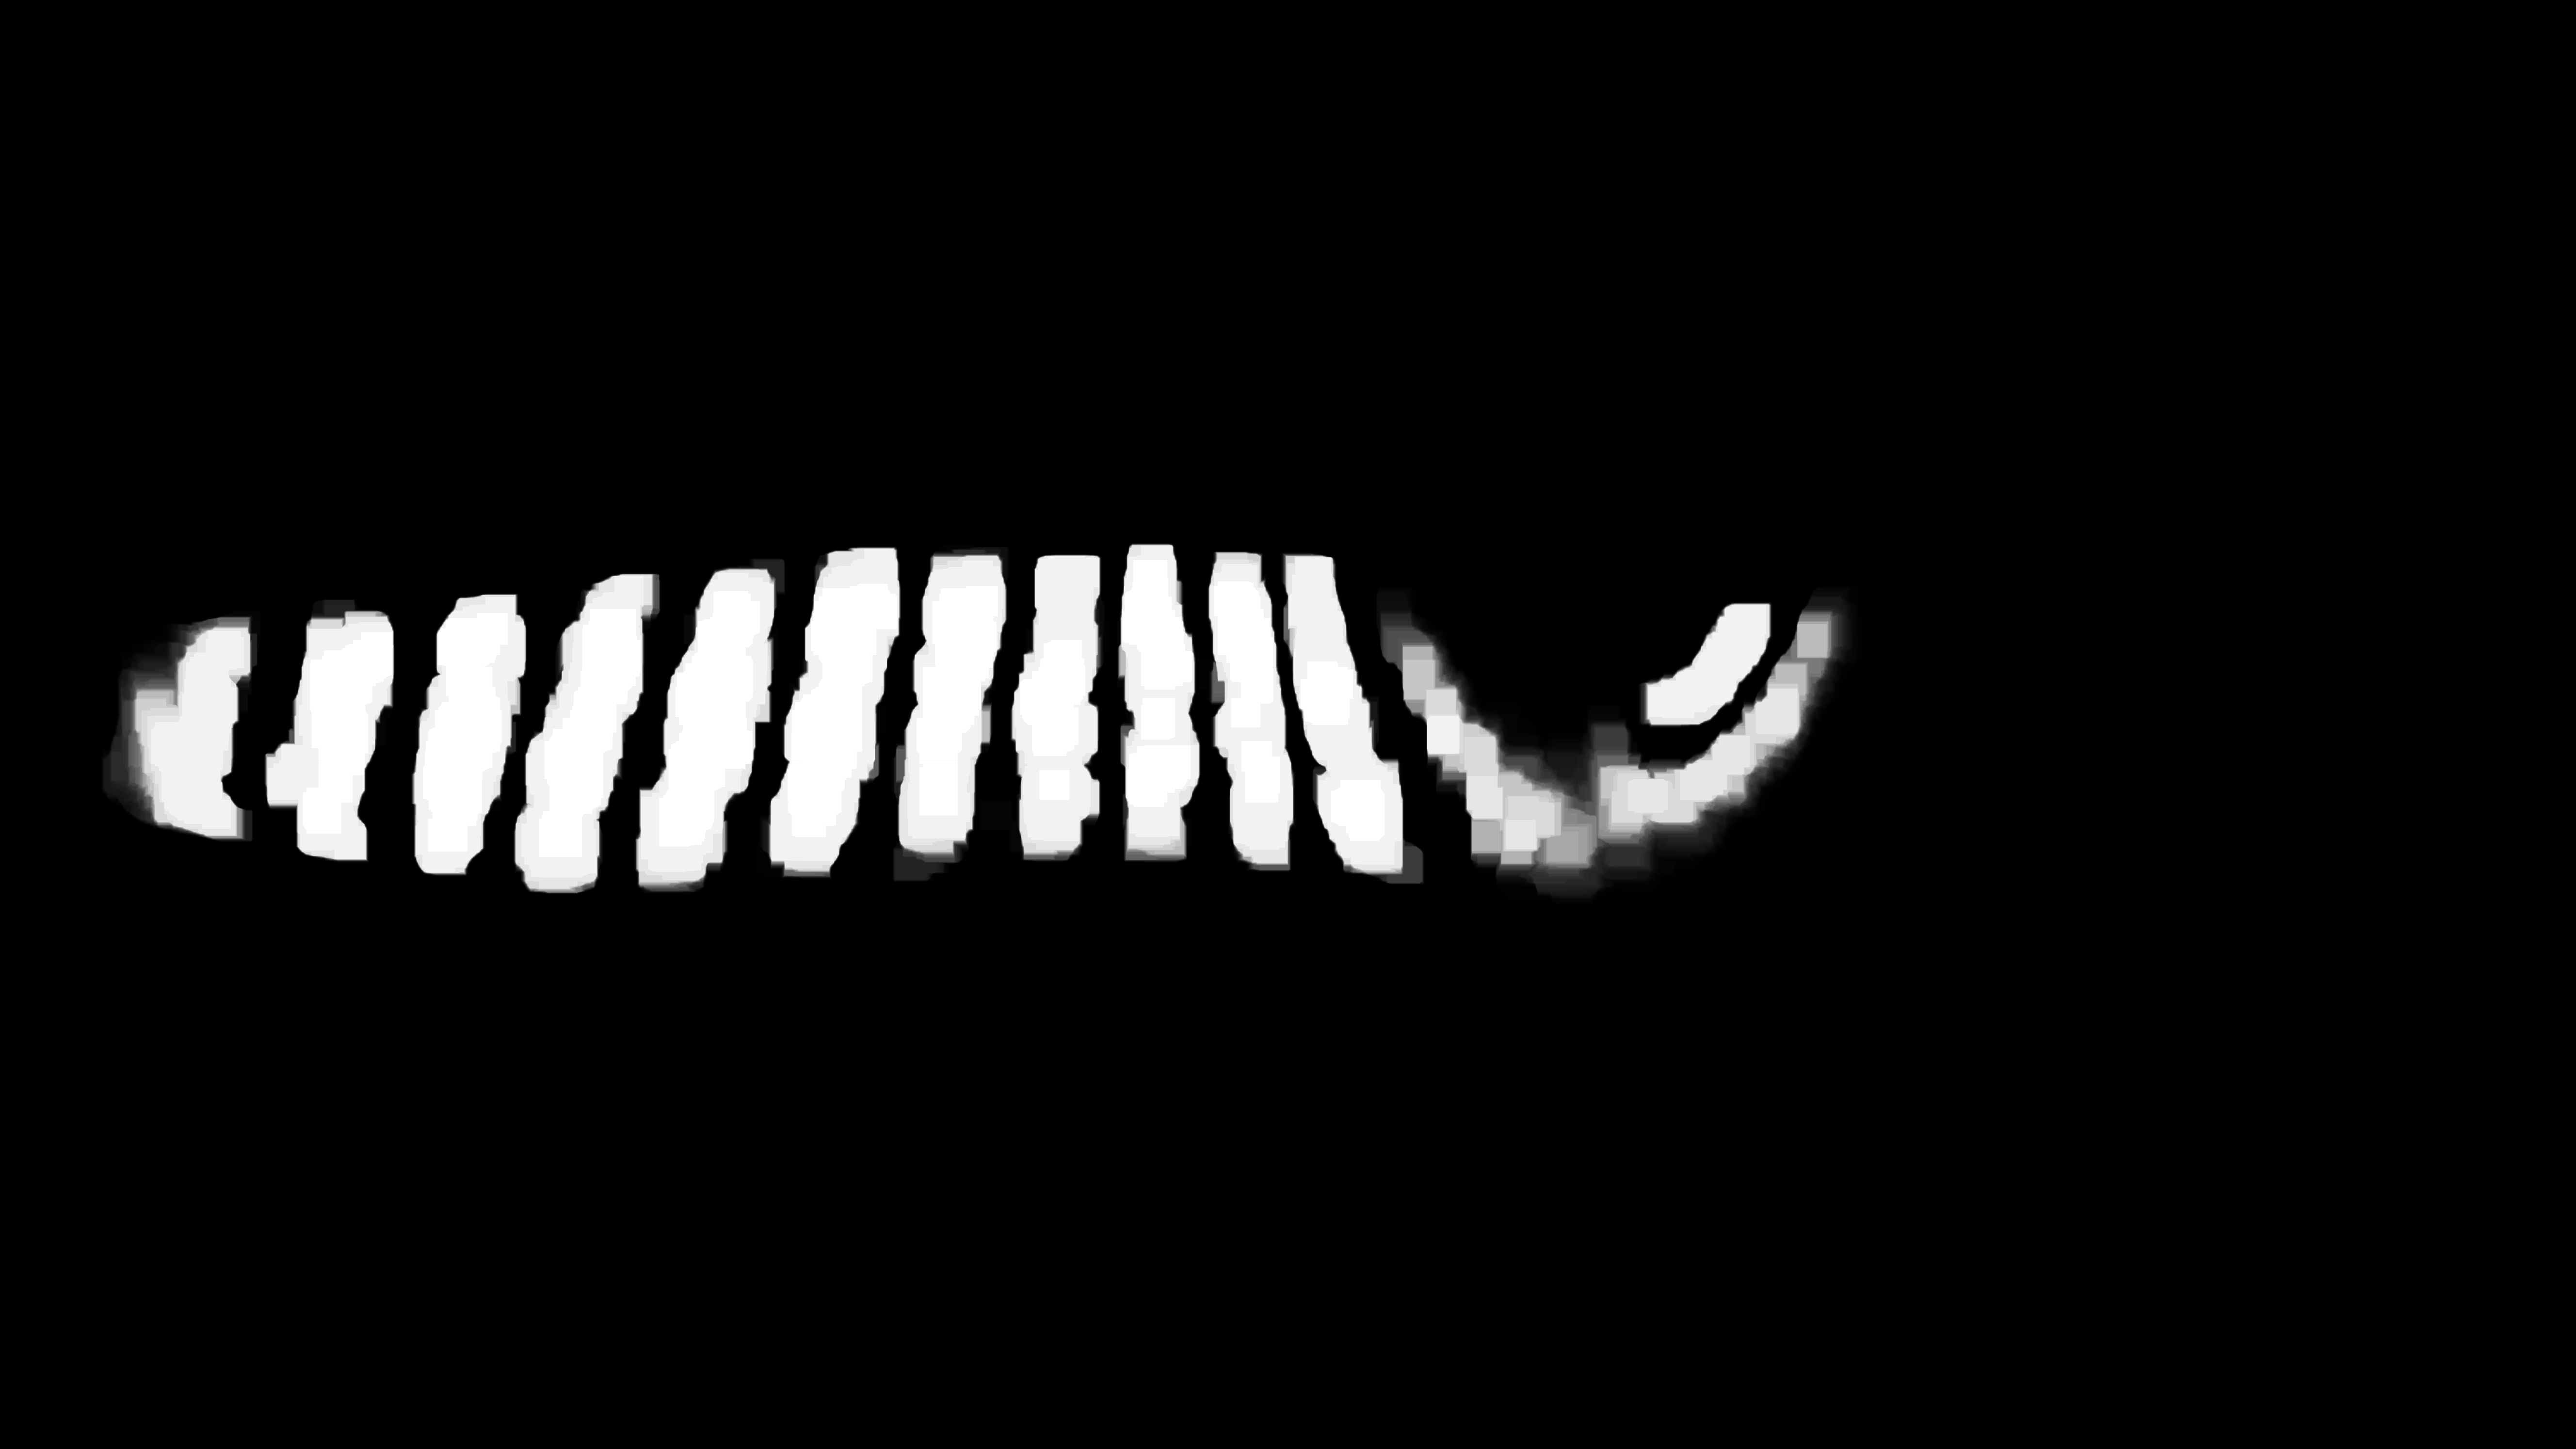

In [17]:
ssss = PIL.Image.fromarray(gogo)
ssss

In [18]:
plt.imshow(ndimage.grey_dilation(gogo, 60)
)


## Labeling for getting $n$ object

### Edge and contour

In [19]:
dddd= ssss.filter(PIL.ImageFilter.FIND_EDGES())

In [20]:
ss2 = PIL.ImageOps.invert(ssss)

### Binaraize

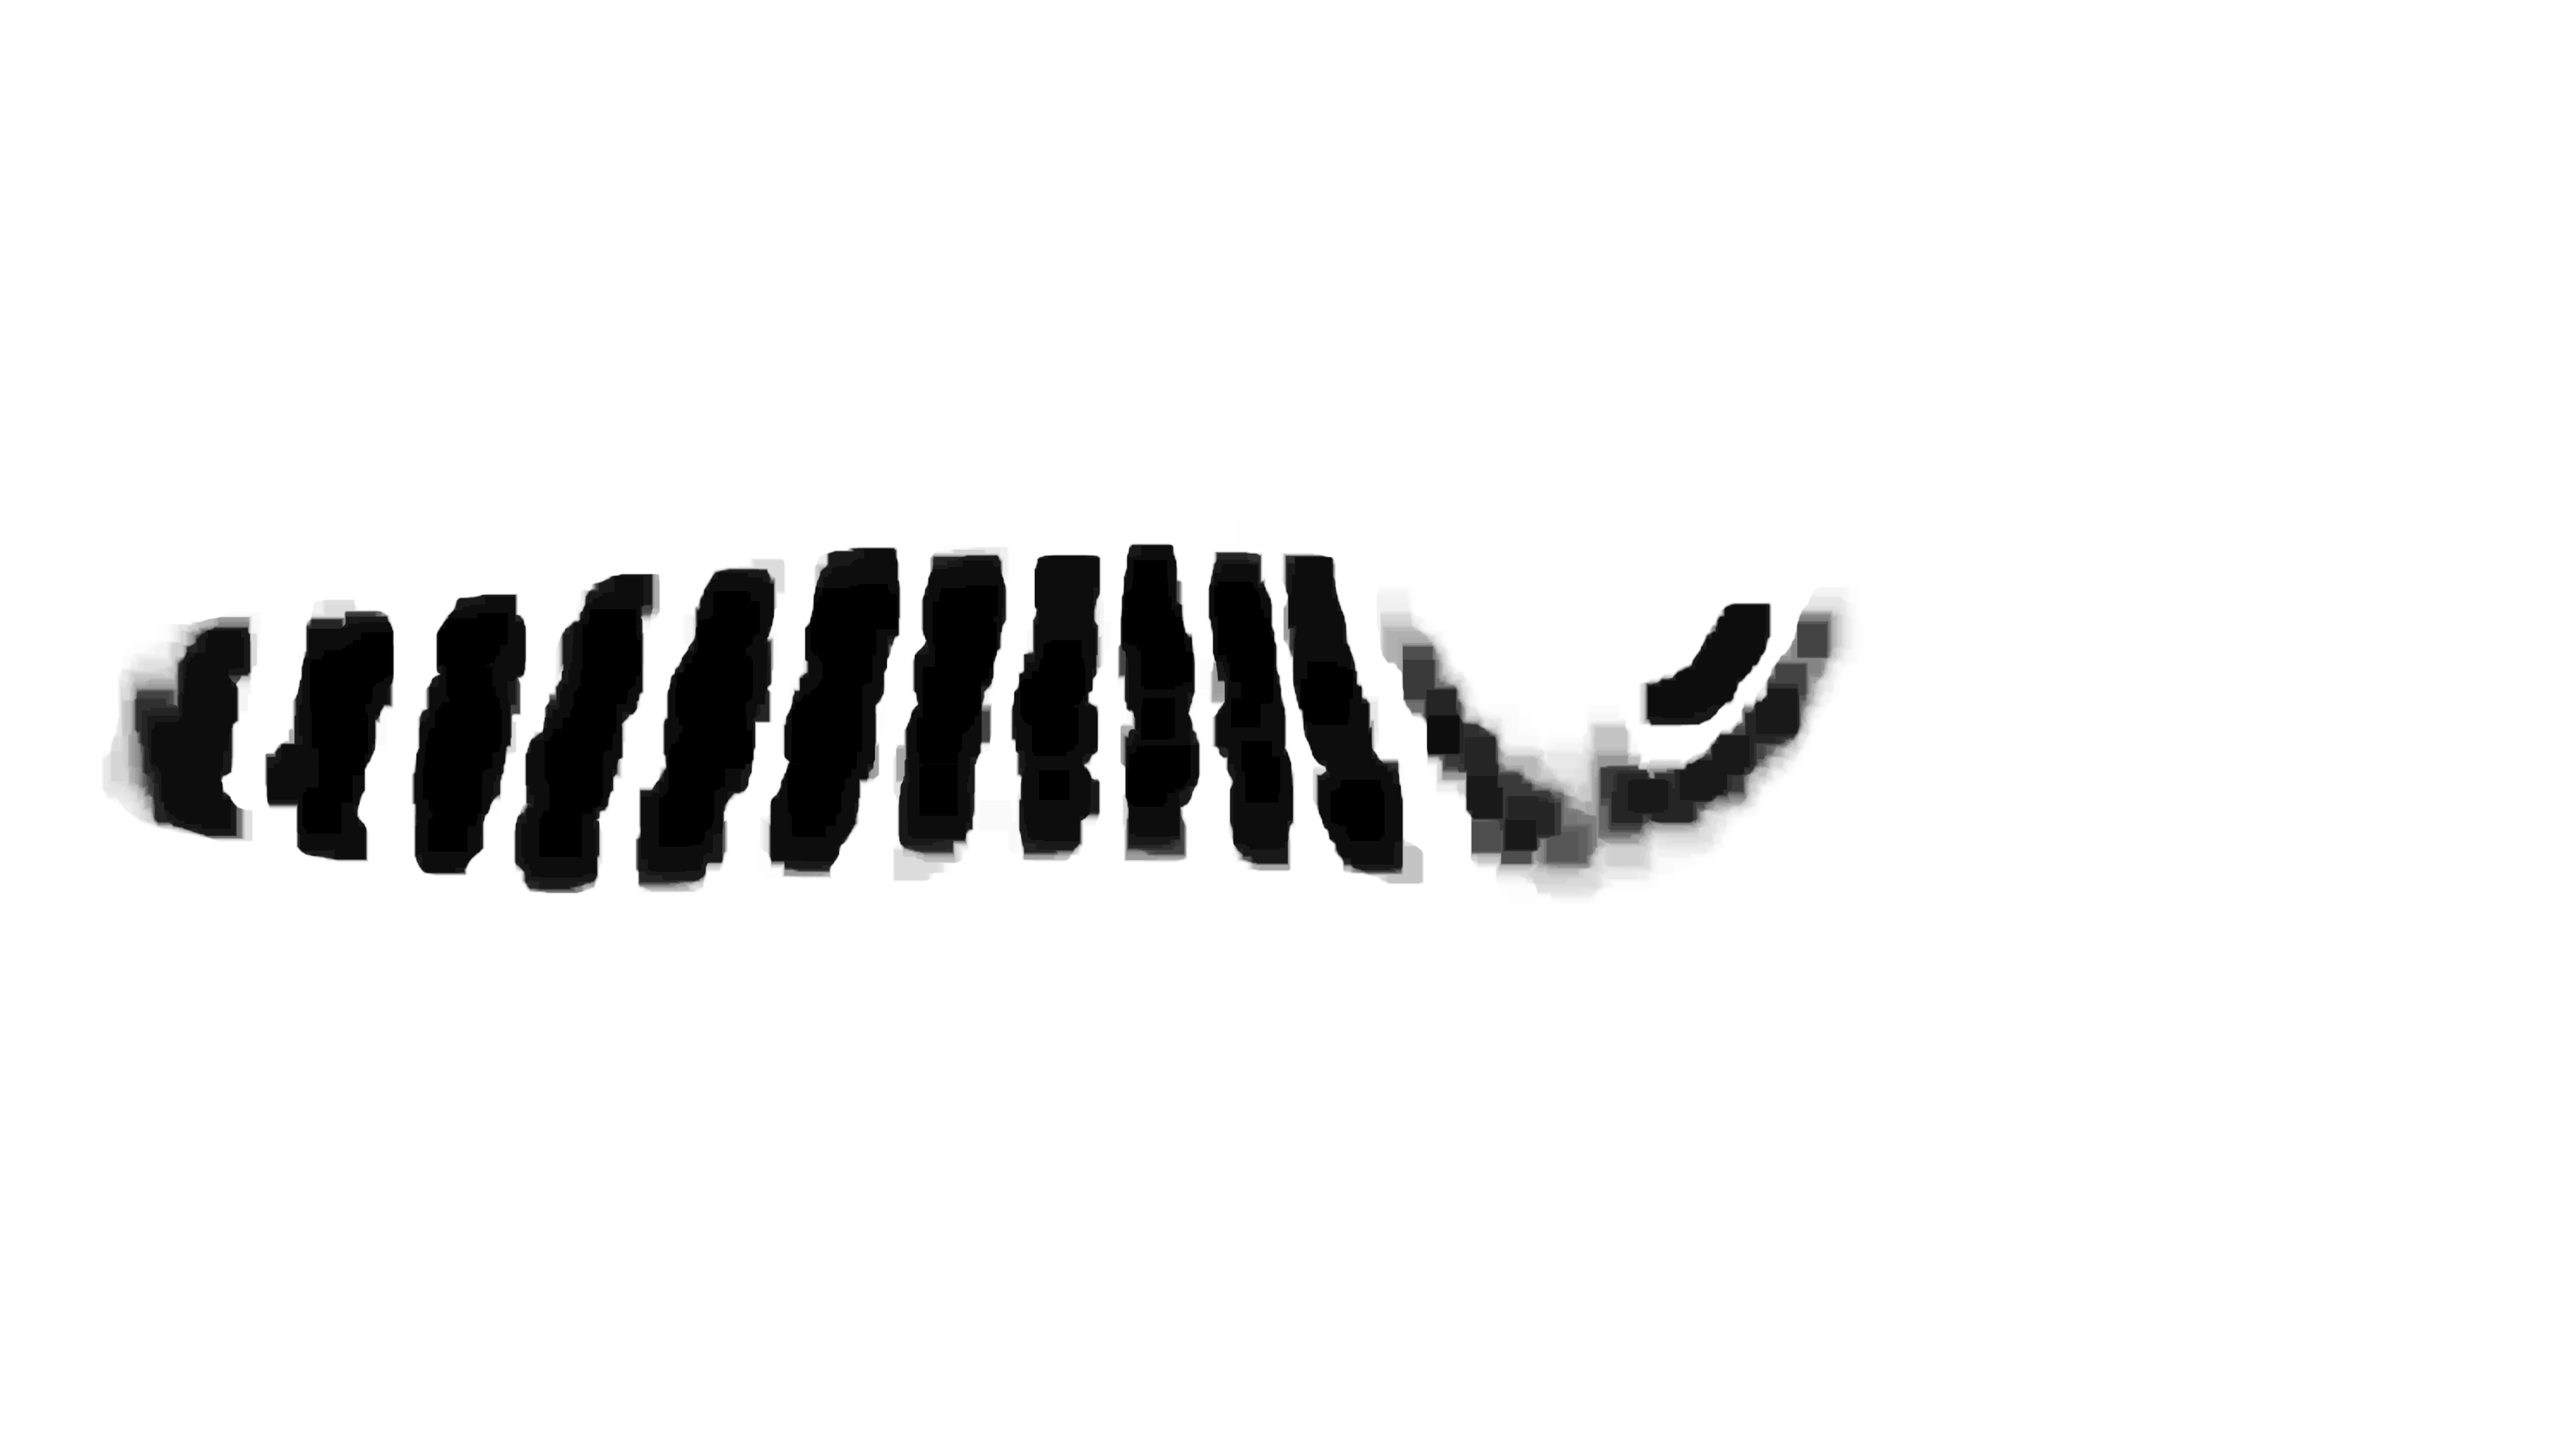

In [21]:
ss2

In [22]:
ffff= ss2.point(lambda c : 255 if c >127 else 0)


### Objectize by finding edges

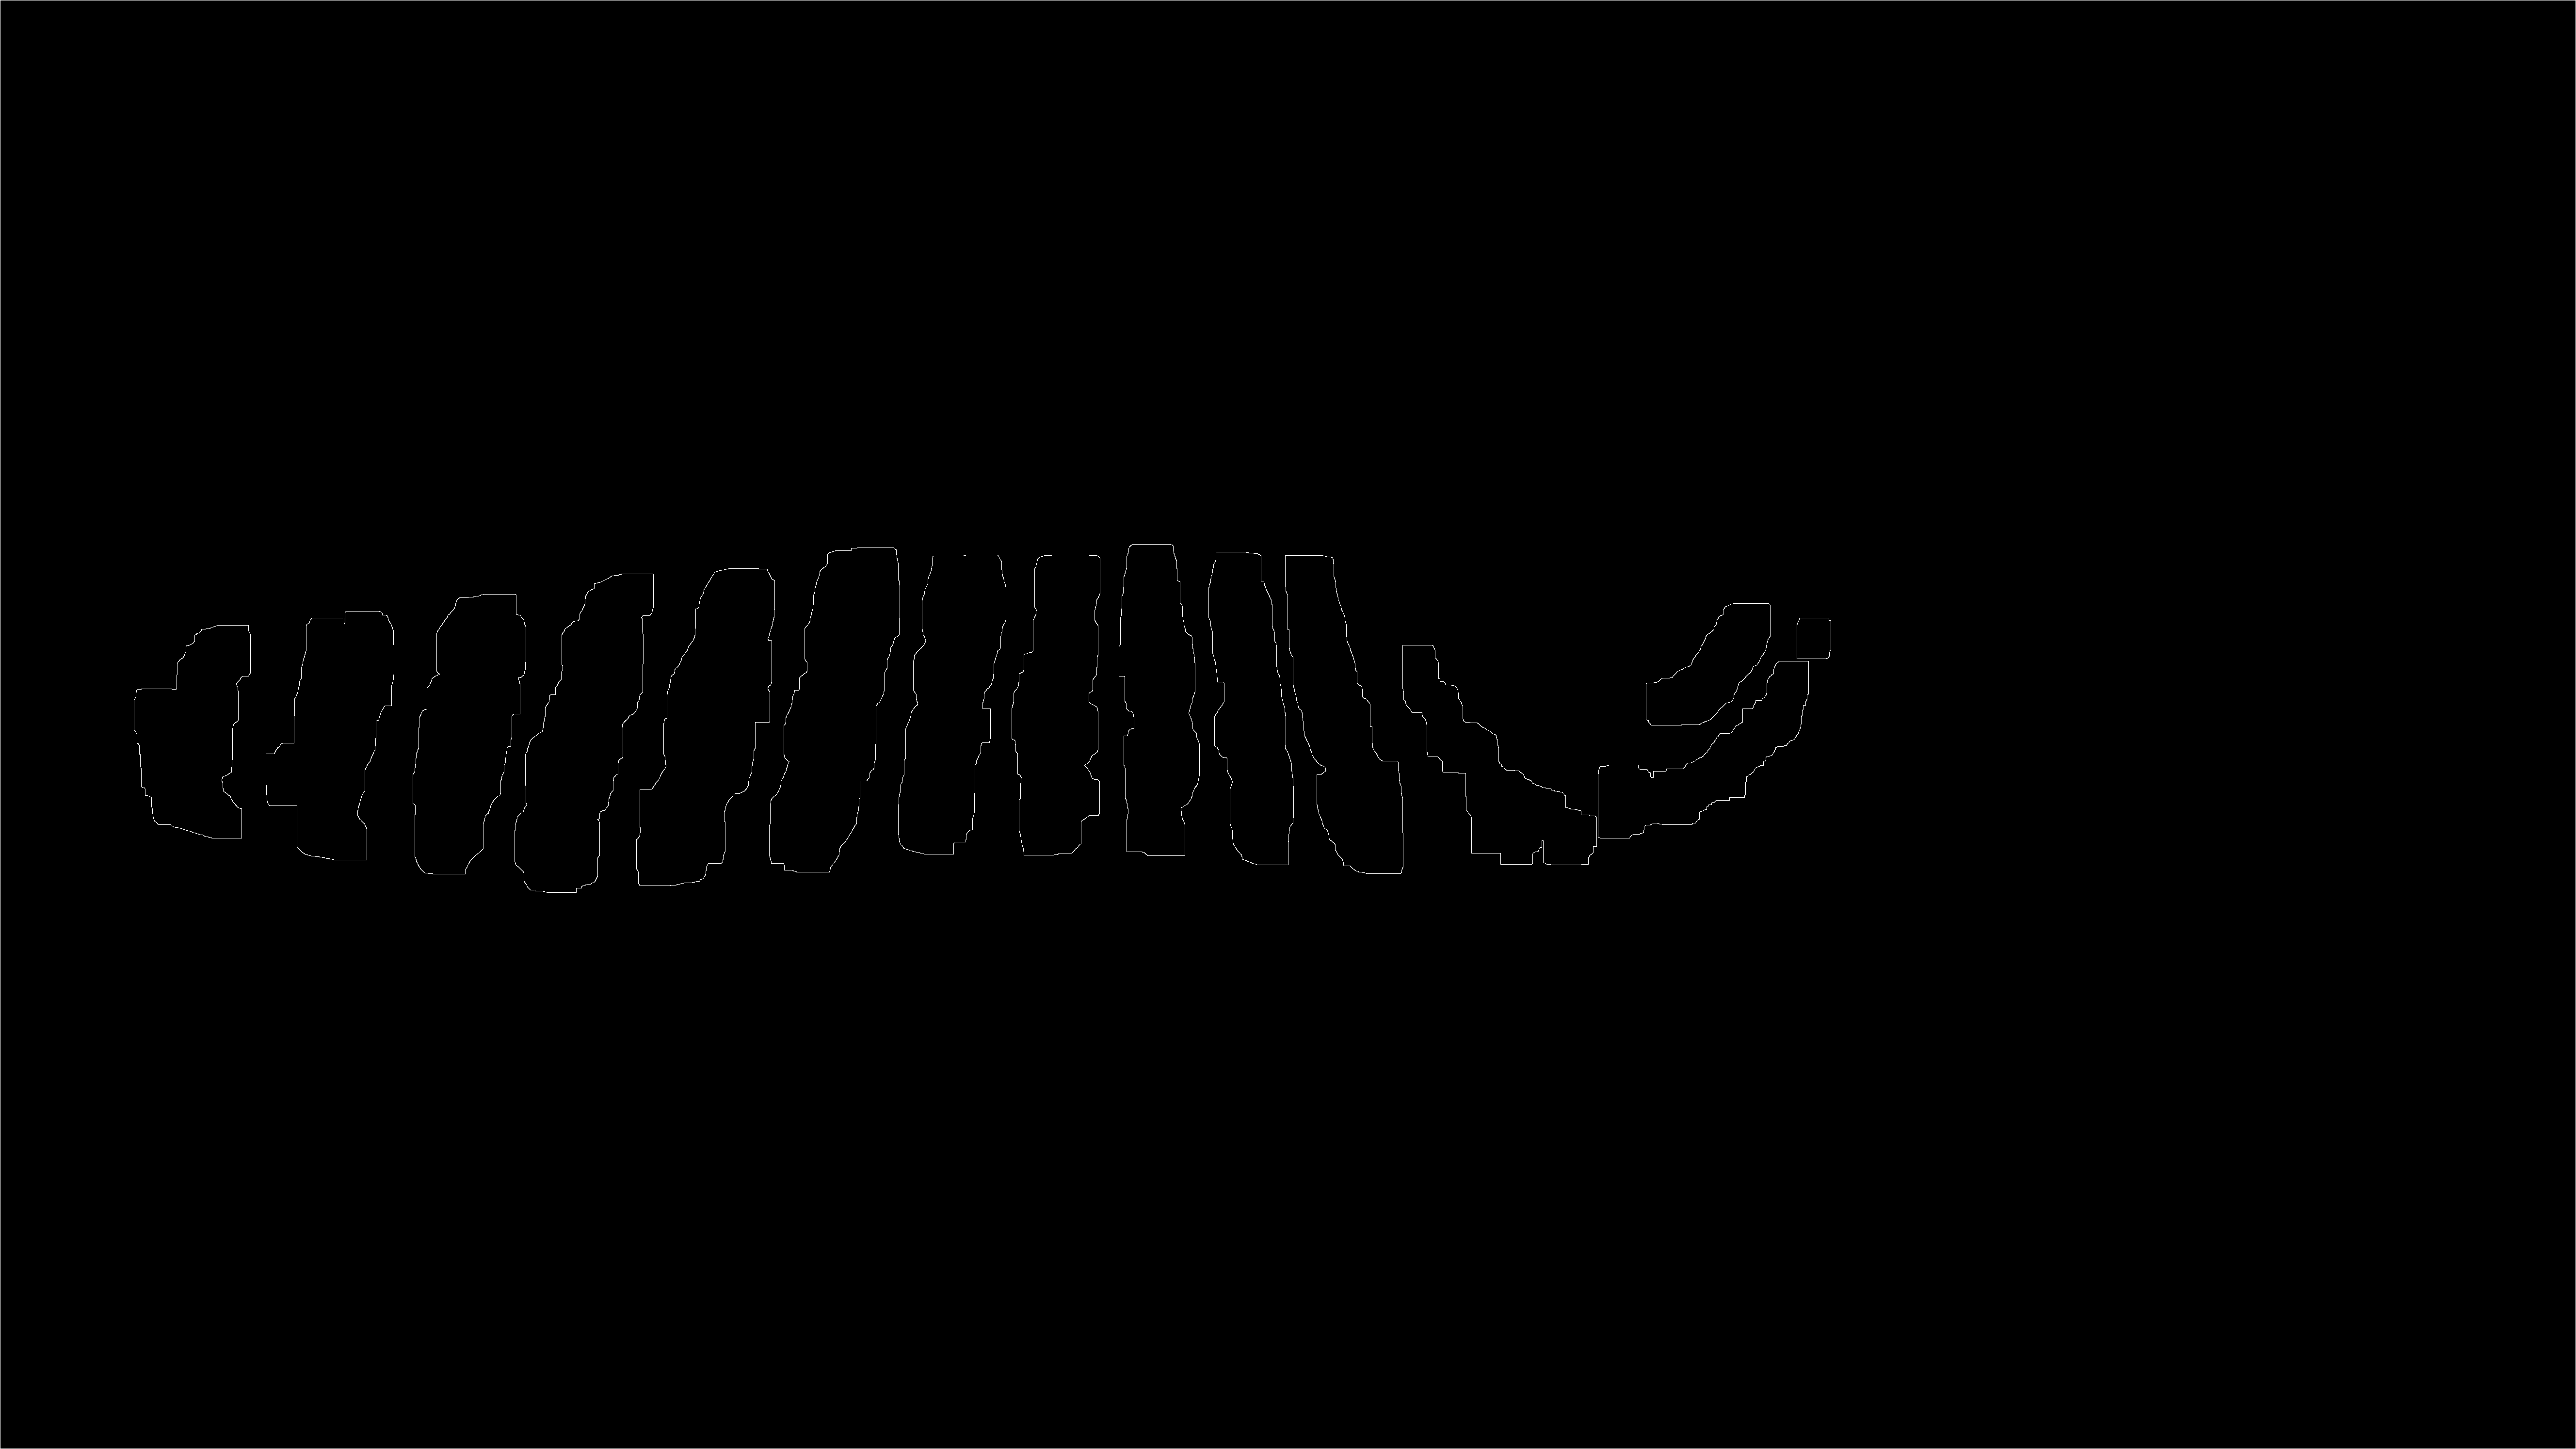

In [23]:
ff2= ffff.filter(PIL.ImageFilter.FIND_EDGES)
ff2=ff2.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
ff2

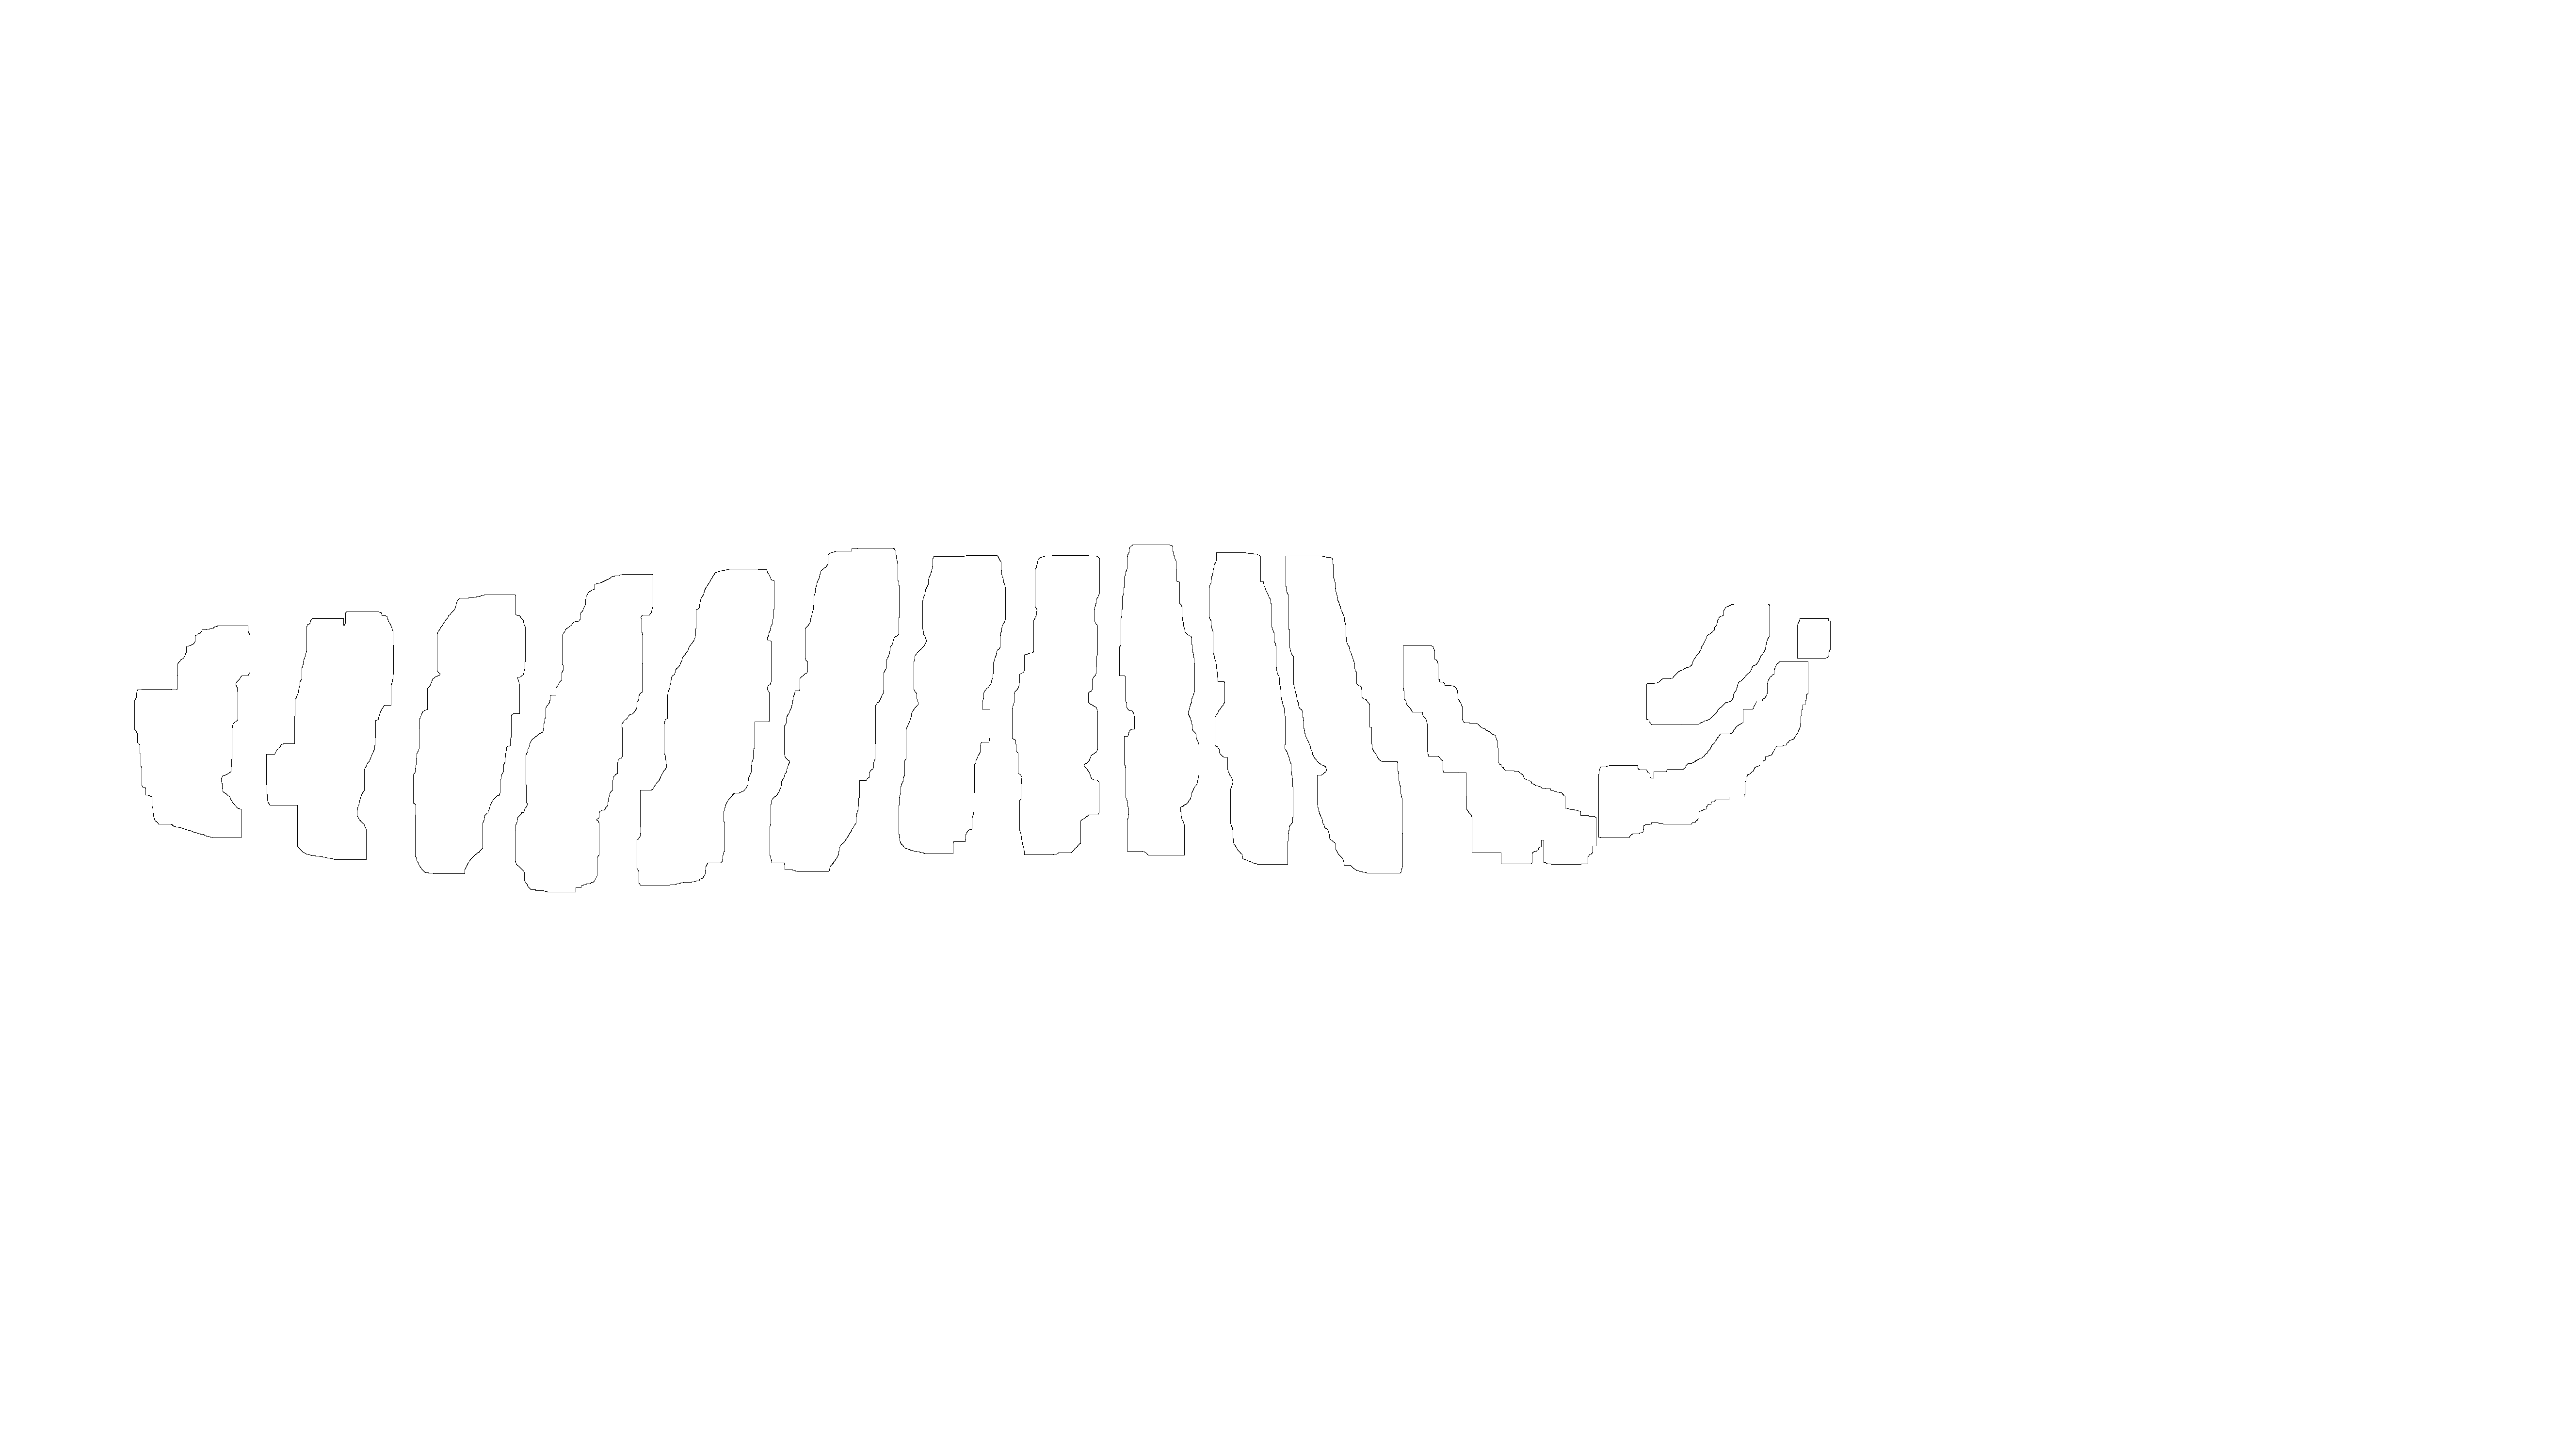

In [24]:
ff3= ffff.filter(PIL.ImageFilter.CONTOUR)
ff3

In [25]:
ffffr = PIL.ImageOps.invert(ffff)

In [26]:
ff2r = PIL.ImageOps.invert(ff2)

In [27]:
ff3r = PIL.ImageOps.invert(ff3)

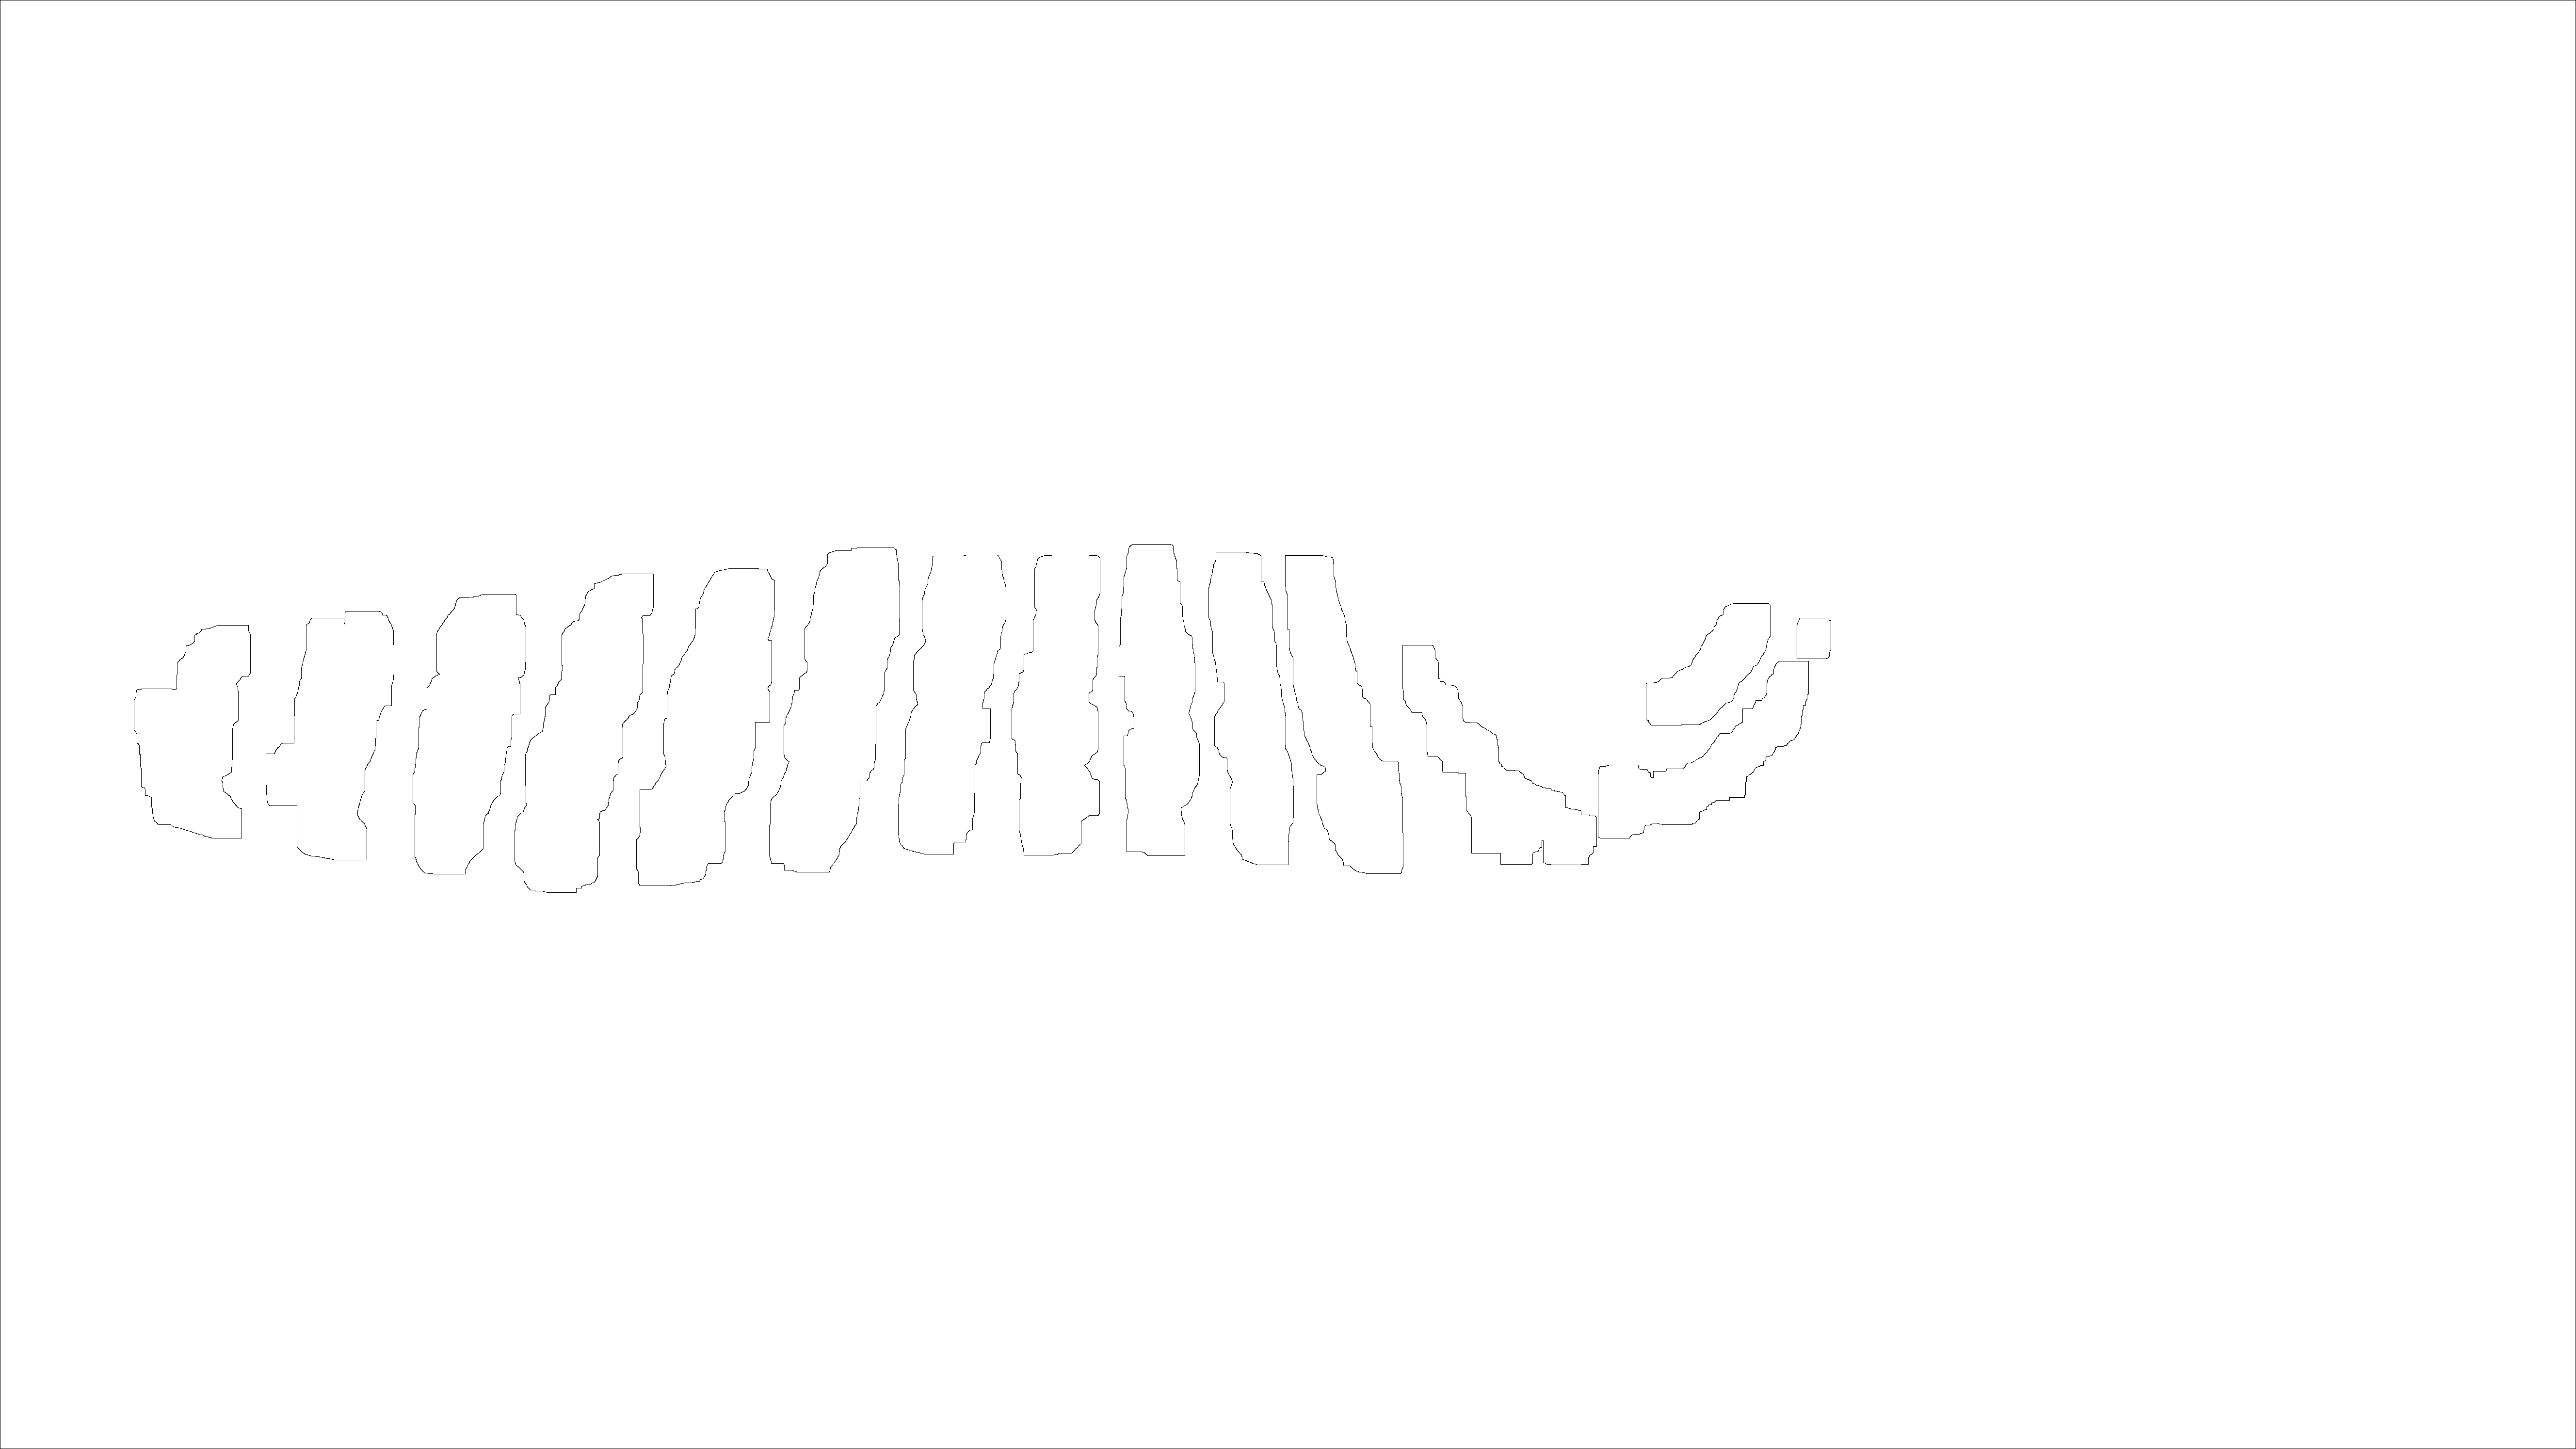

In [28]:
ff2r

In [29]:
xc = [[1,1,1],[1,0,1],[1,1,1]]

In [30]:
z,x = ndimage.measurements.label(ff2r,xc)
z,x

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 1, 0],
        ..., 
        [0, 1, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]]), 16)

In [31]:
np.unique(z)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [32]:
plt.figure(figsize=((15,15))
plt.imshow(z)

In [ ]:
#object로 인지된 것들이 각각 어떻게 형성되어 있는지 확인
for i in range(0,x+1):
    plt.figure(figsize=(15,15))
    plt.imshow(z==i)

##  Crop

###  Getting rectangular point for original img

In [34]:
z.shape

(2988L, 5312L)

In [36]:
def find_rect(x,margin = 0):
    '''return left upper right bottom'''
    rect = []
    for j,i in  enumerate(x.sum(axis=0)):
        if i != x.shape[0]:
            print("left is ",j)
            rect.append(j-margin)
            break
    for j,i in  enumerate(x.sum(axis=1)):
        if i != x.shape[1]:
            print("upper is ",j)
            rect.append(j-margin)

            break

    for j,i in  enumerate(reversed(x.sum(axis=0))):
        if i != x.shape[0] :
            print("right is ",x.shape[1]-j)
            rect.append(x.shape[1]-j+margin)
            break

    for j,i in  enumerate(reversed(x.sum(axis=1))):
        if i != x.shape[1]:
            print("bottom is ",x.shape[0]-j)
            rect.append(x.shape[0]-j+margin)
            break
    return rect

In [37]:
def find_rect2(x,margin = 0):
    '''return left upper right bottom'''
    ##TODO: margin을 percentile 로 적용, and 16:9 비율을 유지하도록 하는 방법 생각

    rect = []
    x_sum_1=x.sum(axis=1)
    x_sum_0=x.sum(axis=0)
    for j,i in  enumerate(x_sum_0):
        if i != x_sum_0[1] & i != 0 :
            print("left is ",j)
            rect.append(j-margin)
            break
    for j,i in  enumerate(x_sum_1):
        if i != x_sum_1[1] & i != 0:
            print("upper is ",j)
            rect.append(j-margin)
            break

    for j,i in  enumerate(reversed(x_sum_0)):
        if i != x_sum_0[-2] & i != 0:
            print("right is ",x.shape[1]-j)
            rect.append(x.shape[1]-j+margin)
            break

    for j,i in  enumerate(reversed(x_sum_1)):
        if i != x_sum_1[-2] & i != 0:
            print("bottom is ",x.shape[0]-j)
            rect.append(x.shape[0]-j+margin)
            break
    return rect

In [38]:
rect = find_rect2(z,0)

left is  276
upper is  1122
right is  3776
bottom is  1840


### Crop original img by rect point

In [39]:
ee = ps_new2.crop(rect)

In [40]:
ee.size[0]/ee.size[1]

4.874651810584958

In [41]:
ee.save(path+'/none.jpg')

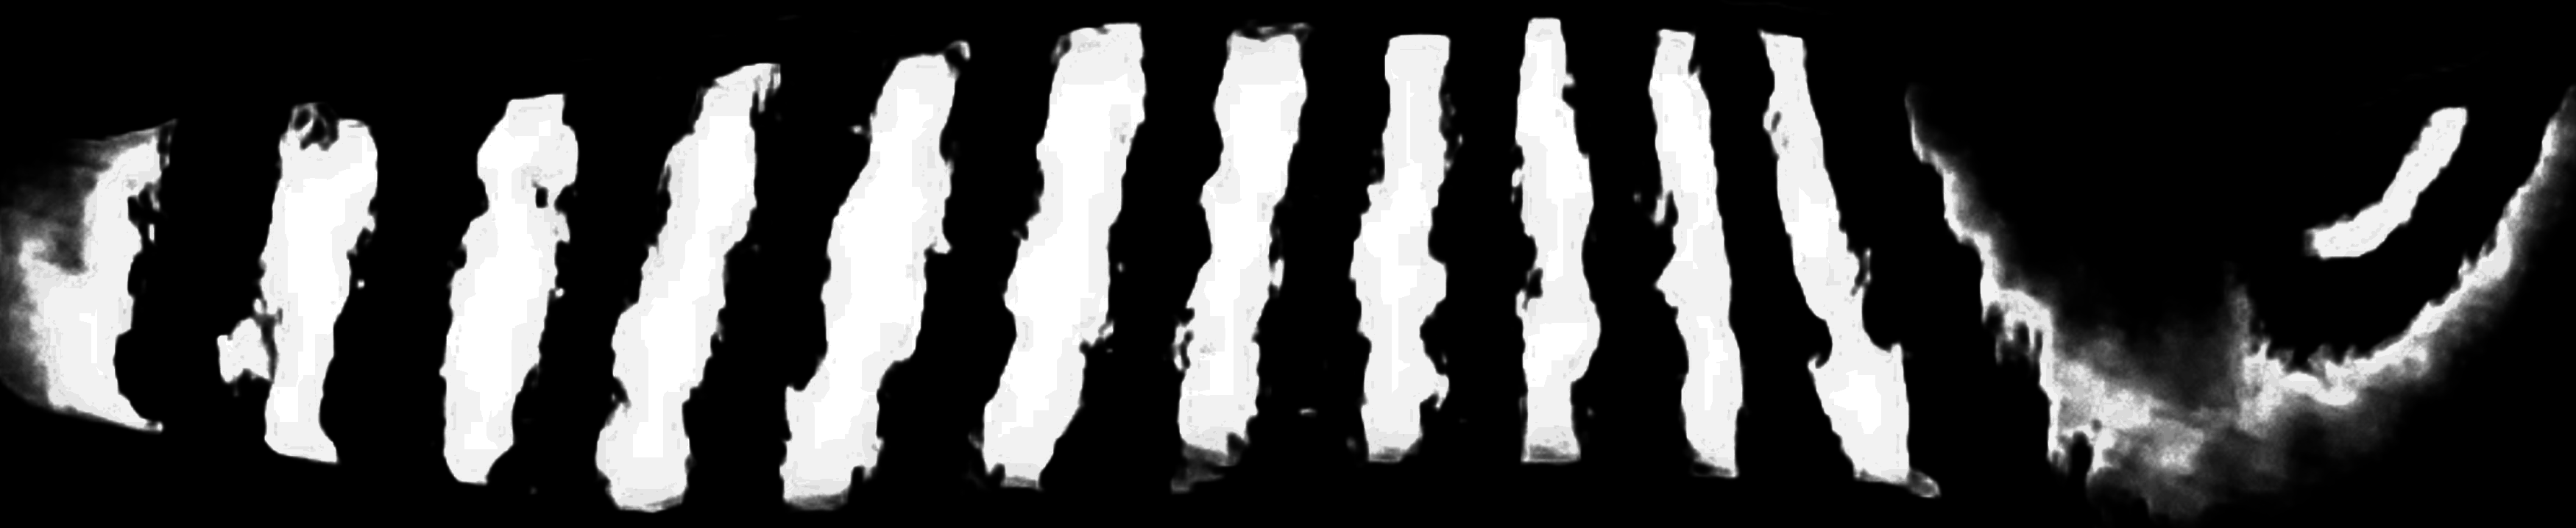

In [42]:
ps_new2.crop(rect)

In [ ]:
plt.imshow(z)

In [43]:
zz = PIL.Image.fromarray(z*255,'1')

In [44]:
len(z.sum(axis=0))

5312

In [45]:
#!start c:\users\back_jud\anaconda2\lib\site-packages\pandas\core\config.py
#판다스 출력 설정

In [46]:
plt.imshow(z)

In [ ]:
max_size = [0,0]
for imgs in get_files :
    imPath = path + imgs
    img = PIL.Image.open(imPath)
    img = img.point(lambda x : 255*(x/255)**13)
    img_c = img.convert('L') 
    img_ic = PIL.ImageOps.invert(img_c)
    img_ic = grey_ero_dil(img_ic,iterat=10, n_ero=10,n_dil= 40)
    img_bic = make_bw(PIL.Image.fromarray(img_ic))
    img_bic = img_bic.filter(PIL.ImageFilter.FIND_EDGES)
    img_bicr = PIL.ImageOps.invert(img_bic)
    lab_arr,num_lab = ndimage.measurements.label(img_bicr,structure=[[1,1,1],[1,0,1],[1,1,1]])
    print("object의 갯수 : " ,imgs, num_lab)
    idx_crop =  find_rect2(lab_arr,margin=200)
    im_final = img_c.crop(idx_crop)
    if im_final.size[0] > max_size[0]:
        max_size[0] = im_final.size[0]
    if im_final.size[1] > max_size[1]:
        max_size[1] = im_final.size[1]

    im_final.save(path+'test/'+imgs)
    
for imgs in listdir(path+'/test'):
    img = PIL.open(path+'/test/'+imgs)
    img

In [ ]:
im_final

In [ ]:
(path+'/test')